# <center> Movie Recommendation System

This is a movie recommendation system, that is trained on a dataset from <a href="https://www.themoviedb.org/" target="_new">The Movie Database (TMDb)</a> <br/>
Let's explore the Dataset!    

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
df1 = pd.read_csv("tmdb_5000_credits.csv")
df2 = pd.read_csv("tmdb_5000_movies.csv")
print(df1.shape)
print(df2.shape)

# We have 4803 different movies in our database!

(4803, 4)
(4803, 20)


In [4]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df2.loc[df2['id']== 49026]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106


The two datasets are linked via the Movie_ID Key, so we'll merge the two, and work with the merged dataset only!


In [7]:
# Joining the two DataFrames 
df1.rename(columns = {'movie_id' : 'id' , 'title':'title_1'}, inplace= True) 
df2 = df2.merge(df1, on ='id')

In [8]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


We need to figure out a scoring method for the movies before filtering, as all movies have different no.of votes, and ratings can't be compared directly. <br/>
Using IMDB's Weighted Rating : WR = (v/v+m)*R  + (m/v+m)*C <br/>
where:<br/>
    v = no.of votes <br/>
    m = minimum votes required to be listed<br/>
    R = Avg. rating<br/>
    C = mean votes across the entire report<br/>

In [16]:
total_votes = df2['vote_count'].sum()
total_ratings = (df2['vote_count']*df2['vote_average']).sum()
c =  total_ratings/total_votes
c

6.76084222668461

In [17]:
#We'll use 85th percentile as the cutoff for the minimum no.of votes required
m = df2['vote_count'].quantile(0.80)
m

957.6000000000004

In [18]:
# Moving forward, we'll only consider the movies having a minimumn of 957 votes!
#Filtering out the movies based on this criterion
fil_mov = df2.copy().loc[df2['vote_count']>=m]
fil_mov.shape

(961, 23)

In [19]:
# So, out of 4803, we are left with 961 movies! That's just 20% of the dataset!

In [20]:
def weighted_rat(df, m = m, C =c):
    v = df['vote_count']
    r = df['vote_average']
    
    x = ((v/(v+m))*r) + ((m/(m+v))*C)
    
    return x

In [21]:
fil_mov['weighted_rat'] = fil_mov.apply(weighted_rat, axis= 1)

In [23]:
fil_mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew,weighted_rat
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.167036
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.875583
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.381367
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.520150
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.305355


There are many different types of recommendation systems for movies, based on features, and based on the user preferences. For this, we'll be working on the following 3 types of recommendation systems!<br /> 
1: Demographic Filtering. This will recommend same movies to the audience with similar demographics <br /> 
2: Content Based Filtering. This will recommend movies based on the content that you like, watch, etc.<br />
3: Collaborative Filtering. This will provide a better recommendation, and will recommend movies that people with similar interests watch (similar actors, directors, etc)


## Demographic Filtering

In [26]:
# Now we can sort the DataFrame on this metric
fil_mov = fil_mov.sort_values('weighted_rat', ascending =False)
fil_mov[['title', 'weighted_rat', 'vote_count', 'vote_average']].head(10)

# The following is recommending the popular movies currently. Similar to Netflix's top 10 in the Country ranking!

,title,weighted_rat,vote_count,vote_average
1881,The Shawshank Redemption,8.318237,8205,8.5
3337,The Godfather,8.170873,5893,8.4
662,Fight Club,8.157877,9413,8.3
3232,Pulp Fiction,8.142962,8428,8.3
65,The Dark Knight,8.093659,12002,8.2
809,Forrest Gump,8.044885,7927,8.2
1818,Schindler's List,8.021201,4329,8.3
3865,Whiplash,8.017189,4254,8.3
96,Inception,8.012820,13752,8.1
1990,The Empire Strikes Back,7.998418,5879,8.2


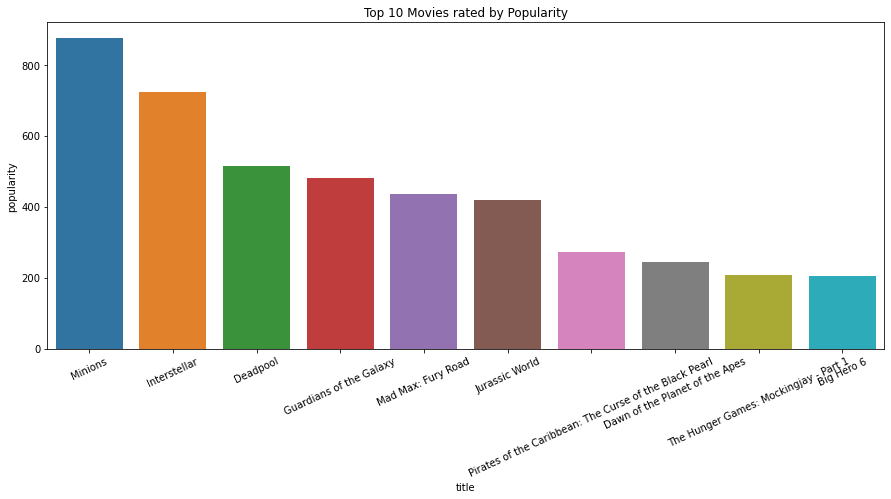

In [58]:
# Popularity based Sorting
pop_mov = df2.sort_values('popularity', ascending = False)
plt.figure(figsize = (15, 6))
p = sns.barplot(y = 'popularity',x ='title' , data =pop_mov.head(10))
plt.xticks(rotation= 25)
plt.title("Top 10 Movies rated by Popularity")
plt.show()

The above movies are general and do not depend on a User's interests! <br/>
Now, we'll move to a better rating, that is based on the content that the user likes!


# Content Based Rating

In [59]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [60]:
#We can find similarity scores for plots of movies 
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf =TfidfVectorizer(stop_words = 'english')
df2['overview'] = df2['overview'].fillna('')

In [62]:
tfidf_m = tfidf.fit_transform(df2['overview'])

tfidf_m.shape

(4803, 20978)

In [63]:
from sklearn.metrics.pairwise import linear_kernel

#Computing cosine similarity
cos_sim = linear_kernel(tfidf_m, tfidf_m)

In [64]:
mov_idx = pd.Series(df2.index , index = df2['title']).drop_duplicates()

In [71]:
# ax = list(enumerate(cos_sim[23]))
# ax = sorted(ax, key = lambda x: x[1], reverse = True)
# ax[1:11]

In [72]:
def recom_cos_sim (title, cos_sim = cos_sim):
    idx = mov_idx[title]
    
    #Getting similarity score of all the movies with the movie in consideration
    sim_scr = list(enumerate(cos_sim[idx]))
    sim_scr = sorted(sim_scr, key = lambda x: x[1], reverse = True)
    sim_scr = sim_scr[1:11] #The top most score will be for the movie with itself.
    movie_idx = [i[0] for i in sim_scr]
    
    return (df2['title'].iloc[movie_idx])

The above function will recommend 10 movies based on the movie that the user likes! 

In [73]:
a =recom_cos_sim('Minions')
print(a)

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title, dtype: object


In [74]:
recom_cos_sim("Wild Wild West")

1218                                 The Guilt Trip
418     Cats & Dogs 2 : The Revenge of Kitty Galore
2276                               The Painted Veil
1007                                  Anna Karenina
4403                                 The Jimmy Show
3492                  The First Great Train Robbery
263                     Around the World in 80 Days
1750         Star Trek VI: The Undiscovered Country
2987                               The Mighty Ducks
4349                                 Love Me Tender
Name: title, dtype: object

### Genre, Credit, Keyword based Recommender:

In [88]:
# We have to extract the first 2 from the cast, crew and keywords
from ast import literal_eval
features = [ 'cast', 'crew', 'keywords', 'genres']
df_feat = df2.copy()
for feature in features:
    df_feat[feature] = df_feat[feature].apply(literal_eval)

In [89]:
df_feat.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."


In [90]:
# We'll get the required information from the columns.
def direct_name(df_x):
    for i in df_x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [91]:
def get_list(df_x):
    if isinstance(df_x, list):
        name = [i['name'] for i in df_x]
        
        if len(name)>4:
            name = name[:4]
        return name
    return []


In [92]:
df_feat['director'] = df_feat['crew'].apply(direct_name)

feat_list = ['cast' , 'keywords' , 'genres']

for feats in feat_list:
    df_feat[feats] = df_feat[feats].apply(get_list)

In [93]:
#df_feat.loc[1 , 'genres']

In [94]:
df_feat.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colony]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski


In [95]:
feat_list.append('title')
feat_list.append('director')


In [96]:
df_feat[feat_list].head(5)

,cast,keywords,genres,title,director
0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[culture clash, future, space war, space colony]","[Action, Adventure, Fantasy, Science Fiction]",Avatar,James Cameron
1,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,Gore Verbinski
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[spy, based on novel, secret agent, sequel]","[Action, Adventure, Crime]",Spectre,Sam Mendes
3,"[Christian Bale, Michael Caine, Gary Oldman, A...","[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",The Dark Knight Rises,Christopher Nolan
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[based on novel, mars, medallion, space travel]","[Action, Adventure, Science Fiction]",John Carter,Andrew Stanton


In [97]:
# Converting the Names to Lowercase and removing space

In [98]:
def lower_case(strs):
    if isinstance(strs, list):
        return[str.lower(i.replace(" ", "")) for i in strs]
    else:
        if isinstance(strs, str):
            return str.lower(strs.replace(" ", ""))
        else:
            return ""
        

In [99]:
for features in feat_list:
    df_feat[features] = df_feat[features].apply(lower_case)

In [100]:
# Let's combine the features to create meta-data
def combine_feats(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df_feat['metadata'] = df_feat.apply(combine_feats, axis = 1)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df_feat['metadata'])

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim2 = cosine_similarity(count_matrix, count_matrix)

In [103]:
df_feat = df_feat.reset_index()
indices = pd.Series(df_feat.index, index =df_feat['title'])

In [105]:
recom_cos_sim('The Smurfs', cos_sim2)

258                                          The Smurfs 2
66                                                     Up
2114                                 Return to Never Land
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
565                                               Shrek 2
899                                                 Shrek
1426                                              Valiant
1695                                              Aladdin
40                                                 Cars 2
77                                             Inside Out
Name: title, dtype: object

In [106]:
# Now, the user is recommended 10 movies based on the Movies Top 4 actors, Director, Related Genres and Movie Plot Keywords

# Collaborative Filtering

In [118]:
#Implementing Singular Value Decomposition
# SVD is a dimensionality reduction technique that decomposes a matrix into three matrices, the first is users' latent factors, 
# the second is a diagonal matrix, that represents the strength of each latent factor, and the third contains the latent factors of the items.
#Since the above data doesn't have user Information, whihc is required for the Collaborative Filtering, we'll use the 


from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

In [119]:
reader = Reader()
ratings =pd.read_csv('ratings_small.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [120]:
print("There are {} unique users in the dataset." .format(len(ratings.userId.unique())))

There are 671 unique users in the dataset.


In [121]:

kf = KFold(n_splits=5)
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating' ]], reader)

kf.split(data)

<generator object KFold.split at 0x0000025F98FD4EC8>

In [122]:
svd = SVD()

In [123]:
cross_validate(svd, data, measures = ['rmse', 'mae'], verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8886  0.8931  0.9063  0.8964  0.8984  0.8966  0.0059  
MAE (testset)     0.6839  0.6885  0.6988  0.6900  0.6939  0.6910  0.0050  
Fit time          5.67    5.68    5.48    6.09    6.01    5.78    0.23    
Test time         0.18    0.15    0.27    0.18    0.17    0.19    0.04    


{'test_rmse': array([0.88864937, 0.89308049, 0.90631513, 0.89642428, 0.89835741]),
 'test_mae': array([0.68392486, 0.68852226, 0.69878865, 0.68995505, 0.69394652]),
 'fit_time': (5.665408372879028,
  5.682655572891235,
  5.480091094970703,
  6.0860278606414795,
  6.007667303085327),
 'test_time': (0.1759958267211914,
  0.1479966640472412,
  0.27299976348876953,
  0.1770017147064209,
  0.16500639915466309)}

In [124]:
trainset = data.build_full_trainset()

In [125]:
svd.fit(trainset);

In [129]:
#The following gives the ratings for User ID 

#ratings[ratings['userId']==4].sort_values('movieId')

In [170]:
#Let's see what's the predicted rating for User 1 for movie 20 is:
# The following will predict the movie ratings based on the SVD.
UserID = 1
MovieID = 30

a = svd.predict(UserID, MovieID)
print("The predicted Rating of Movie: {}, for User {}, is: {}".format(a.uid, a.iid, format(a.est, '.2f')))

The predicted Rating of Movie: 1, for User 30, is: 2.79


In [171]:
#This is a Collaborative Filtering based result, however, there's room for more work, and I'll update the files once I get the chance to work on it!